# Image Classification with MobileNet

MobileNets are a class of small, low-latency, low-power models that can be used for classification, detection, and other common tasks convolutional neural networks are good for. Because of their small size, these are considered great deep learning models to be used on mobile devices.

### Comparing MobileNets To Other Models
To give a quick comparison in regards to size, the size of the full VGG16 network on disk is about 553 megabytes. The size of one of the currently largest MobileNets is about 17 megabytes, so that is a huge difference, especially when you think about deploying a model to a mobile app or running it in the browser.

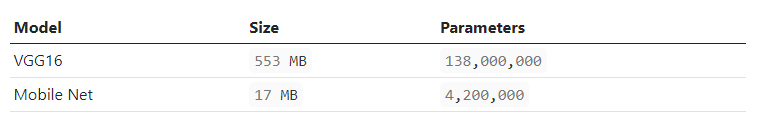

Now, while MobileNets are faster and smaller than other major networks, like VGG16, for example, there is a tradeoff. That tradeoff is accuracy, but don't let this discourage you.

Yes, MobileNets typically aren't as accurate as these other large, resource-heavy models, but they still actually perform very well, with really only a relatively small reduction in accuracy. Here is a MobileNets paper that elaborates further on this tradeoff if you're interested in studying this further.

In [36]:
import numpy as np
from tensorflow import keras
from tensorflow.keras.applications import imagenet_utils
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
%matplotlib inline

In [37]:
img = image.load_img('trafficlights.jpg', target_size=(224, 224))

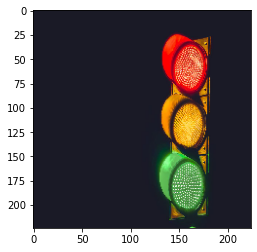

In [38]:
plt.imshow(img)

What we're going to do is download a MobileNet model, and then use it for inference just on a few random images to see how well it classifies these images according to ImageNet classes.

We first make a call to tf.keras.applications.mobilenet.MobileNet() to obtain a copy of a single pretrained MobileNet with weights that were saved from being trained on ImageNet images. We're assigning this model to the variable mobile.

In [39]:
mobile = tf.keras.applications.mobilenet.MobileNet()

In [40]:
def prepare_image(file):
    img_path = ''
    img = image.load_img(img_path + file, target_size=(224, 224))
    img_array = image.img_to_array(img)
    img_array_expanded_dims = np.expand_dims(img_array, axis=0)
    return tf.keras.applications.mobilenet.preprocess_input(img_array_expanded_dims)

In [41]:
preprocessed_image = prepare_image('trafficlights.jpg')
predictions = mobile.predict(preprocessed_image)

1/1 [==============================] - 1s 623ms/step


Then, we're using an ImageNet utility function provided by Keras called decode_predictions(). It returns the top five ImageNet class predictions with the ImageNet class ID, the class label, and the probability. With this, we'll be able to see the five ImageNet classes with the highest prediction probabilities from our model on this given image. Recall that there are 1000 total ImageNet classes.

In [42]:
results = imagenet_utils.decode_predictions(predictions)

In [43]:
results

[[('n06874185', 'traffic_light', 0.996478),
  ('n04286575', 'spotlight', 0.0030688953),
  ('n03424325', 'gasmask', 0.00036738085),
  ('n03759954', 'microphone', 1.2608914e-05),
  ('n03706229', 'magnetic_compass', 8.286701e-06)]]